In [63]:
import numpy as np
import random
# throw coin
# decide who starts based on coin
# starter throws coin and gets n steme
# second player throws n + 1 times and gets m steme
# starter wins if n >= m
# else second player wins
# j1 stema prob = 2/3
# stema j0 = 1/2

def play(prob = 0.5):
    N = 0
    player2_debt = 0
    while(1):
        coin_flip = random.random()
        if(coin_flip < prob):
            dice = np.random.choice(range(6), size=1) + 1 # player2 throws dice, add 1 because random.choice picks from 0 to 5 in our line
            player2_debt = dice - 3
            break
        else:
            player2_debt -= 0.5
        N += 1
    return N, player2_debt

def play():
    n = np.random.choice([0,1])
    starter = 'j0' if n == 0 else 'j1'
    second = 'j0' if starter == 'j0' else 'j1'
    m = 0
    for n in range(n + 1):
        if second == 'j0':
            m += np.random.choice([0,1])
        else:
            m += np.random.choice([0,1,1])
        
    winner = starter if n >= m else second
    return winner
            

nr_simulations = 30000
simulations = np.empty(nr_simulations)

for i in range(0, nr_simulations):
    result = play()
    simulations[i] = 1 if result == 'j1' else 0
    
print(f'Player j1 has a {simulations.mean()} chance to win')
"""
P(C|A) = ?

"""    

Player j1 has a 0.5007666666666667 chance to win


In [42]:
# StartingPlayer
# NrSteme = M
# Stema = N

import numpy as np
import math
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

model = BayesianNetwork([('StartingPlayer', 'Stema'),
                         ('StartingPlayer', 'NrSteme'),
                         ('Stema', 'NrSteme')
                         ])

cpd_starting_player = TabularCPD(variable='StartingPlayer', variable_card=2,
                                 values=[[0.5], [0.5]])

cpd_stema = TabularCPD(variable='Stema', variable_card=2,
                   values=[[1/3, 1/2],  # P(N=0|S)
                           [2/3, 1/2]], # P(N=1|S)
                   evidence=['StartingPlayer'],
                   evidence_card=[2])

cpd_nr_steme = TabularCPD(variable='NrSteme', variable_card=3,
                   values=[[1/3, 1/9, 1/2, 1/4],         # P(M=0|S=0, N), P(M=0|S=1, N)
                           [2/3, 4/9, 1/2, 2/4],         # P(M=1|S=0, N), P(M=1|S=1, N)
                           [0  , 4/9,   0, 1/4]],        # P(M=2|S=0, N), P(M=2|S=1, N)
                   evidence=['StartingPlayer', 'Stema'],
                   evidence_card=[2, 2])

model.add_cpds(cpd_starting_player, cpd_stema, cpd_nr_steme)

# Check if the model is valid
print(model.check_model())

from pgmpy.inference import VariableElimination

inference = VariableElimination(model)

posterior_s = inference.query(variables=['StartingPlayer'], evidence={"NrSteme": 1})

print(posterior_s)

True
+-------------------+-----------------------+
| StartingPlayer    |   phi(StartingPlayer) |
+===================+=======================+
| StartingPlayer(0) |                0.5091 |
+-------------------+-----------------------+
| StartingPlayer(1) |                0.4909 |
+-------------------+-----------------------+


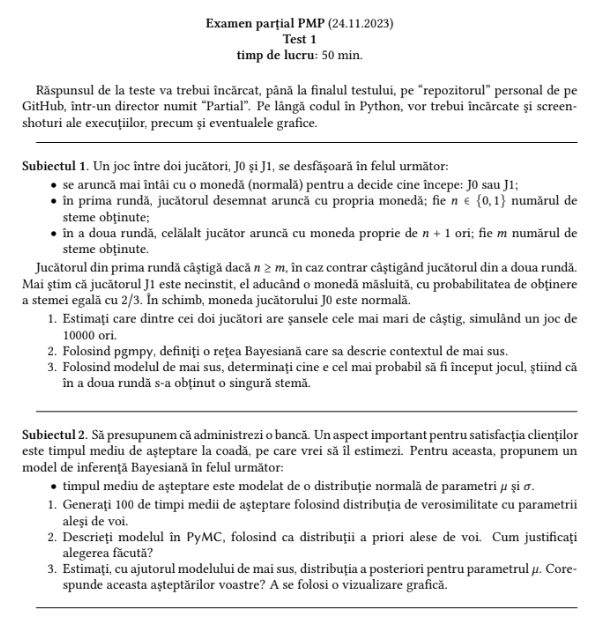

In [2]:
from IPython.display import Image
Image(filename="img.png")

0.9963188624445496
[ 9.07680858  9.12508755  8.67387697  9.70649022  9.55886099 10.82341219
 10.13775056  9.4336361  11.34622783 10.01273285  9.60406782 11.12286416
 10.90989529  9.3585494  11.25297361  9.87670348 11.2180784   8.96731556
 10.39369502  9.37458838 10.79243587  8.92259627  9.86681802 10.51202008
  8.76986054 11.90771908 11.18520425  9.97843284  9.95216813  9.56040713
 10.15655886  9.29636568 10.40712775 10.2305721  11.16714097  9.88131535
  8.61613434 11.34674703 10.50539712  8.45071929  9.21948879 10.34058087
 10.86623986 10.53423061 10.28155194 11.88783205  9.3680163  11.29672498
  9.51019073  8.66731012 10.59024684  9.12125916 11.46576738  9.05725828
  9.60819821  9.03115236 11.13846537  8.18034607 11.01177331  8.48928601
 10.86687195  8.88041632 11.4690772   9.150486    9.50417201 11.28992558
  8.67215417  9.23900149 10.21226801  9.01526178 10.88183463  8.76393068
 10.42321674  7.65284768  8.45657093 11.87915633  8.63625579  9.54283288
 10.2697559  10.47202782  9.4876

INFO:pymc.sampling.mcmc:Auto-assigning NUTS sampler...
INFO:pymc.sampling.mcmc:Initializing NUTS using jitter+adapt_diag...
INFO:pymc.sampling.mcmc:Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc.sampling.mcmc:NUTS: [mu, sigma]


Output()

INFO:pymc.sampling.mcmc:Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 30 seconds.



Model Summary:
        mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
mu     9.972  0.103     9.769     10.167      0.001    0.001    8138.0   
sigma  1.014  0.074     0.877      1.162      0.001    0.001    7583.0   

       ess_tail  r_hat  
mu       5080.0    1.0  
sigma    5726.0    1.0  


KeyError: 'mu'

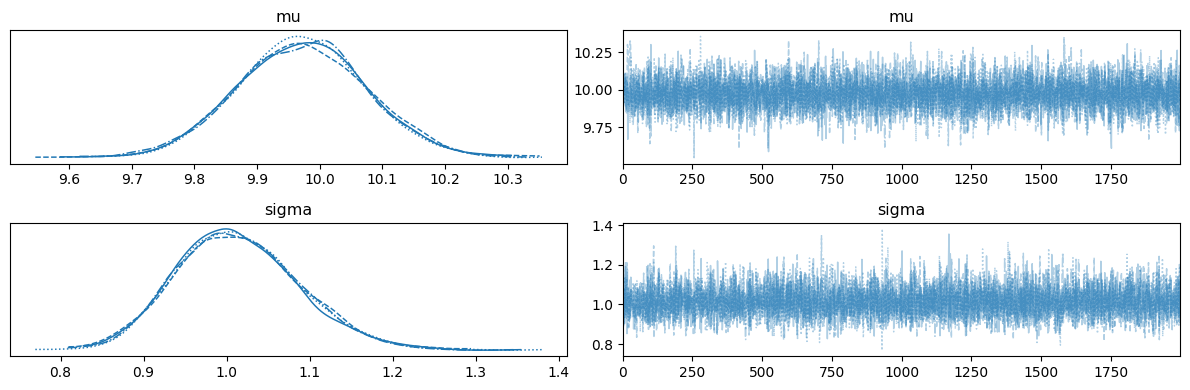

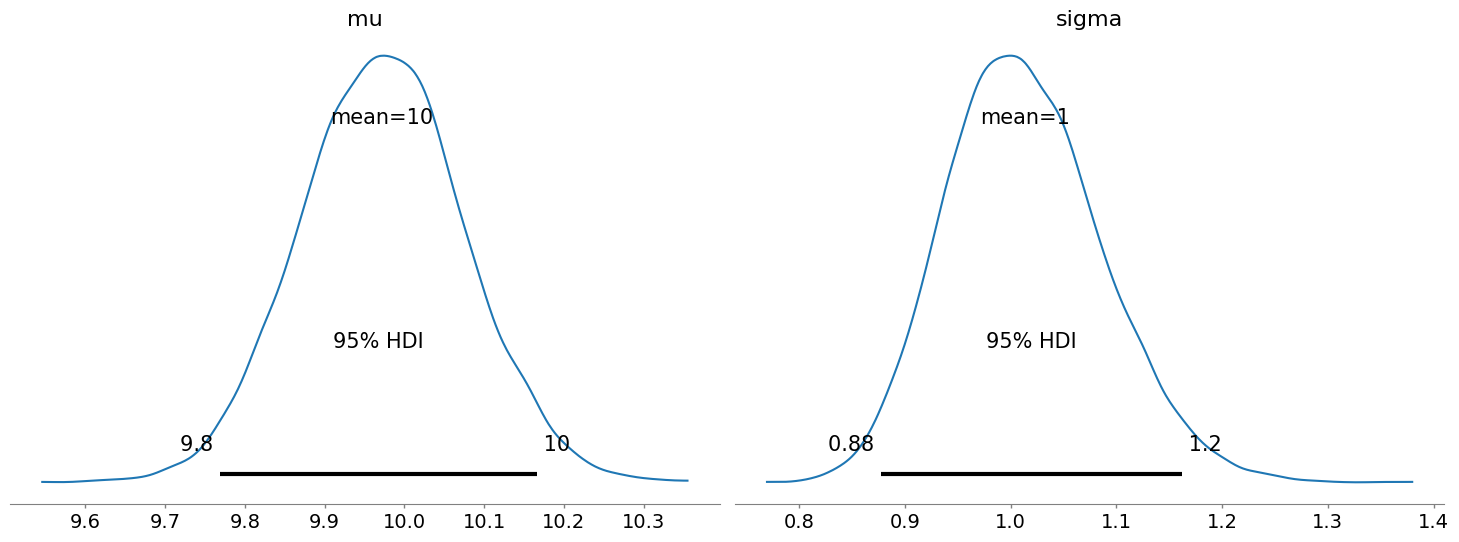

In [56]:
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# Data
wait_times = np.random.normal(loc=10, size=100)
wait_times = wait_times

x = np.mean(wait_times)
print(wait_times.std())
print(wait_times)

# Create the model
with pm.Model() as noise_model:
    # Prior for μ - chosen based on typical bank waiting times
    mu = pm.Normal('mu', mu=x, sigma=10)
    
    # Prior for sigma - chosen to be weakly informative but positive
    sigma = pm.HalfNormal('sigma', sigma=100)

    # Likelihood
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=wait_times)

    # Sample
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

# Print summary statistics
summary = az.summary(trace, hdi_prob=0.95)
print("\nModel Summary:")
print(summary) 

# Plotting
az.plot_trace(trace)
plt.tight_layout()

# Plot posterior distributions
az.plot_posterior(trace, hdi_prob=0.95)
plt.tight_layout()

# Get HDI intervals
mu_hdi = az.hdi(trace, var_names=['mu'])
sigma_hdi = az.hdi(trace, var_names=['sigma'])

pm.plot_posterior(trace['mu'], credible_interval=0.95)

print("\n95% HDI for μ:", mu_hdi['mu'])
print("95% HDI for σ:", sigma_hdi['sigma'])

In [91]:
with open('a.txt') as f:
    data = f.read().split()
    
# all_words = []
# for separator in [' ', ',', '.', '!', '?', '\n']:

print(len(set(data[3])))

words_sorted = sorted(data, key=lambda k: len(set(k)), reverse=True)

print(words_sorted)
with open('output.txt', 'w') as f:
    for word in words_sorted:
        f.write(f'{word} - {len(word)}\n')

4
['mancat', 'banane', 'ananas.', 'Azi', 'mere', 'pere', 'am', 'si', 'si', 'si', 'un']
